# Amazon Review Data Exploration

https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

SAMPLE CONTENT:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_fr.tsv

|DATA COLUMNS:| Description |
|-------------|--------|
|marketplace       | 2 letter country code of the marketplace where the review was written. |
|customer_id       | Random identifier that can be used to aggregate reviews written by a single author. |
|review_id         | The unique ID of the review. |
|product_id        | The unique Product ID the review pertains to. In the multilingual dataset the reviews                    for the same product in different countries can be grouped by the same product_id. |
|product_parent    | Random identifier that can be used to aggregate reviews for the same product. |
|product_title     | Title of the product. |
|product_category  | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
|star_rating       | The 1-5 star rating of the review. |
|helpful_votes     | Number of helpful votes. |
|total_votes       | Number of total votes the review received. |
|vine              | Review was written as part of the Vine program. |
|verified_purchase | The review is on a verified purchase. |
|review_headline   | The title of the review. |
|review_body       | The review text. |
|review_date       | The date the review was written. |

DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
COLUMNS_TO_DROP=["marketplace", "vine", "verified_purchase"]

# sample file
# DATA_FILE="dataset/amazon_reviews/sample_us.tsv"

# first 10k entries from Wireless category
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_10k.tsv"

# first 500k entries from Wireless category
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_500k.tsv"

# first 1mil entries from Wireless category
DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_1mil.tsv"

# full 9mil Wireless reviews - not enough memory locally to do this
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00.tsv"

# pandas is doing something weird. The lines that says have bad number of columns actually have the right columns???
reviews_df = pd.read_csv(DATA_FILE, sep="\t", 
                         parse_dates=["review_date"], 
                         warn_bad_lines=True, 
                         error_bad_lines=False)
reviews_df.info()

b'Skipping line 51163: expected 15 fields, saw 22\n'
b'Skipping line 77018: expected 15 fields, saw 22\nSkipping line 97528: expected 15 fields, saw 22\n'
b'Skipping line 145503: expected 15 fields, saw 22\nSkipping line 172172: expected 15 fields, saw 22\nSkipping line 185136: expected 15 fields, saw 22\nSkipping line 187592: expected 15 fields, saw 22\n'
b'Skipping line 222158: expected 15 fields, saw 22\nSkipping line 232048: expected 15 fields, saw 22\nSkipping line 232320: expected 15 fields, saw 22\nSkipping line 234653: expected 15 fields, saw 22\nSkipping line 257210: expected 15 fields, saw 22\nSkipping line 261368: expected 15 fields, saw 22\n'
b'Skipping line 262843: expected 15 fields, saw 22\nSkipping line 274082: expected 15 fields, saw 22\nSkipping line 276172: expected 15 fields, saw 22\nSkipping line 327076: expected 15 fields, saw 22\n'
b'Skipping line 328675: expected 15 fields, saw 22\nSkipping line 366744: expected 15 fields, saw 22\nSkipping line 380897: expected 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997929 entries, 0 to 997928
Data columns (total 15 columns):
marketplace          997929 non-null object
customer_id          997929 non-null int64
review_id            997929 non-null object
product_id           997929 non-null object
product_parent       997929 non-null int64
product_title        997929 non-null object
product_category     997929 non-null object
star_rating          997929 non-null int64
helpful_votes        997929 non-null int64
total_votes          997929 non-null int64
vine                 997929 non-null object
verified_purchase    997929 non-null object
review_headline      997928 non-null object
review_body          997729 non-null object
review_date          997927 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 114.2+ MB


In [3]:
# looks like sometimes we have reviews with no body, no headline, and no review dates
# let's drop those rows with missing data
# also drop the following columns since they will always be the same
clean_df = reviews_df.dropna().drop(COLUMNS_TO_DROP, axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997726 entries, 0 to 997928
Data columns (total 12 columns):
customer_id         997726 non-null int64
review_id           997726 non-null object
product_id          997726 non-null object
product_parent      997726 non-null int64
product_title       997726 non-null object
product_category    997726 non-null object
star_rating         997726 non-null int64
helpful_votes       997726 non-null int64
total_votes         997726 non-null int64
review_headline     997726 non-null object
review_body         997726 non-null object
review_date         997726 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 99.0+ MB


count    168976.000000
mean          5.904543
std          28.798156
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        3779.000000
dtype: float64


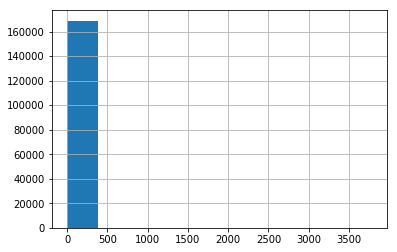

In [4]:
# how many products do we have?
total_products = clean_df.groupby("product_parent").count()
print(clean_df.groupby("product_parent").size().describe())
# 170k products - most only have 1 reviews

clean_df.groupby("product_parent").size().hist()

In [5]:
# ???is there a better way to do this????
# can we do some type of quantile or adaptive binning that would make sense?


# how many products have 1 reviews
products_one_review = len(clean_df.groupby("product_parent").filter(lambda x: len(x) == 1).groupby("product_parent"))

# how many products have 2 to 3 reviews
products_two_reviews = len(clean_df.groupby("product_parent").filter(lambda x: 2 <= len(x) <= 3).groupby("product_parent"))

# only 39k products have > 3 reviews
products_three_plus_reviews = len(clean_df.groupby("product_parent").filter(lambda x: len(x) > 3).groupby("product_parent"))



print(f"1 review:\t{round(products_one_review/total_products, 2) * 100}% ({products_one_review})")
print(f"2-3 review:\t {round(products_two_reviews/total_products, 2) * 100}% ({products_two_reviews})")
print(f"3+ review:\t {round(products_three_plus_reviews/total_products, 2) * 100}% ({products_three_plus_reviews})")



1 review:	                customer_id  review_id  product_id  product_title  \
product_parent                                                      
4830              9438200.0  9438200.0   9438200.0      9438200.0   
17863             9438200.0  9438200.0   9438200.0      9438200.0   
20452             9438200.0  9438200.0   9438200.0      9438200.0   
21044             9438200.0  9438200.0   9438200.0      9438200.0   
34247             3146067.0  3146067.0   3146067.0      3146067.0   
35475             3146067.0  3146067.0   3146067.0      3146067.0   
36365             9438200.0  9438200.0   9438200.0      9438200.0   
36426             9438200.0  9438200.0   9438200.0      9438200.0   
40290             9438200.0  9438200.0   9438200.0      9438200.0   
52362             9438200.0  9438200.0   9438200.0      9438200.0   
65047              181504.0   181504.0    181504.0       181504.0   
73217              255086.0   255086.0    255086.0       255086.0   
75466             943820

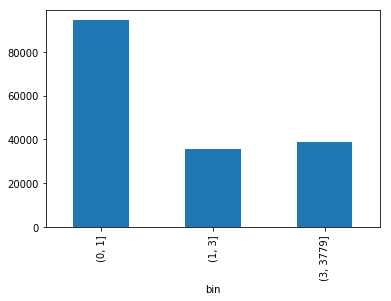

In [6]:
# trying some type of binning

products_df = pd.DataFrame(clean_df.groupby("product_parent").size(), columns=["count"])
products_df = products_df.assign(bin=lambda x: pd.cut(x["count"], [0, 1, 3, x["count"].max()]))
products_df.groupby("bin").size().plot(kind='bar')

# let's look at review distribution dates

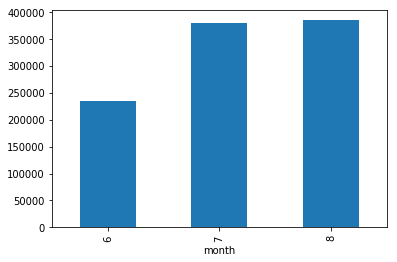

In [7]:
# distribution of months

df = clean_df
df["month"] = df.review_date.dt.month
df.groupby("month").size().plot(kind='bar')

In [8]:
# let's check to see if this is correct

print(df["review_date"].min())
print(df["review_date"].max())

2015-06-10 00:00:00
2015-08-31 00:00:00


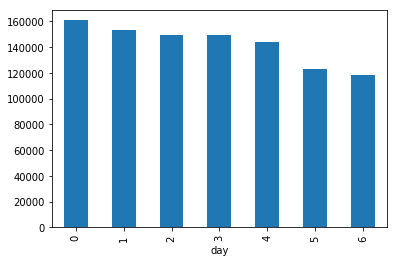

In [9]:
# distribution of days of the week
# distribution of months

df = clean_df
df["day"] = df.review_date.dt.dayofweek
df.groupby("day").size().plot(kind='bar')

# Review Stars Distribution

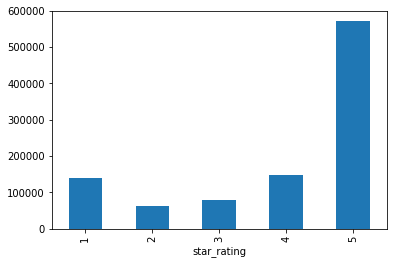

In [10]:
# let's look at distribution of stars
clean_df.groupby("star_rating").size().plot(kind='bar')
# reviews lean heavily towards 5-stars

In [11]:
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.total_votes > 0)]) / len(clean_df), 2)* 100} percent "\
      f"({len(clean_df[(clean_df.total_votes > 0)])}) has votes")
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.helpful_votes > 0)]) / len(clean_df), 2)* 100} percent "\
            f"({len(clean_df[(clean_df.helpful_votes > 0)])}) has helpful votes")


# let's look at distribution of total_votes
clean_df.describe()
# looks like most do not have any votes

21.0 percent (210116) has votes
15.0 percent (153534) has helpful votes


,customer_id,product_parent,star_rating,helpful_votes,total_votes,month,day
count,9.977260e+05,9.977260e+05,997726.000000,997726.000000,997726.000000,997726.000000,997726.000000
mean,2.284734e+07,4.995493e+08,3.952240,0.556236,0.747492,7.150671,2.803965
std,1.657805e+07,2.873581e+08,1.464954,8.317788,9.072997,0.772650,1.969103
min,1.000500e+04,4.830000e+03,1.000000,0.000000,0.000000,6.000000,0.000000
25%,8.750266e+06,2.525092e+08,3.000000,0.000000,0.000000,7.000000,1.000000
50%,2.018955e+07,4.971095e+08,5.000000,0.000000,0.000000,7.000000,3.000000
75%,3.817300e+07,7.468628e+08,5.000000,0.000000,0.000000,8.000000,4.000000
max,5.309655e+07,9.999930e+08,5.000000,3005.000000,3018.000000,8.000000,6.000000


# Review Headlines

count        37.000000
mean      26965.567568
std       80403.225160
min           1.000000
25%         106.000000
50%        2688.000000
75%       25224.000000
max      486073.000000
dtype: float64


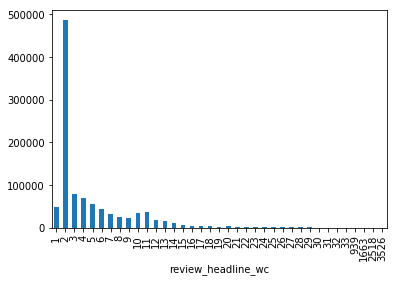

In [12]:
# let's look at wordcount for headlines
df = clean_df
# this doesn't work
# df = df.apply(review_headline_wc=lambda x: len(x["review_headline"].str.split()))
# this doesn't work either - seems to be applying split across all headlines
# df["review_headline_wc"] = df["review_headline"].str.split().count()


df["review_headline_wc"] = df["review_headline"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_headline_wc")
print(grouped.size().describe())

df.groupby("review_headline_wc").size().plot(kind='bar')

# Review Body

In [13]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

df.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5



Looks like most 50% of reviews have 6 words or less

At 75% percentile we start seeing reviews with 6+ words

In [14]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_body_wc")
print(grouped.size().describe())

count     1307.000000
mean       763.371079
std       4042.402432
min          1.000000
25%          2.000000
50%          6.000000
75%         51.000000
max      69344.000000
dtype: float64


In [15]:
# let's plot by quantile

quantile_list = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.]
quantiles = df["review_body_wc"].quantile(quantile_list)

print(quantiles)

df = df.assign(review_body_quantile=lambda x: pd.cut(x["review_body_wc"], quantiles.array))
df

0.0       1.0
0.1       2.0
0.2       5.0
0.3       8.0
0.4      11.0
0.5      16.0
0.6      23.0
0.7      32.0
0.8      48.0
0.9      82.0
1.0    6537.0
Name: review_body_wc, dtype: float64


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74,"(48.0, 82.0]"
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318,"(82.0, 6537.0]"
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4,"(2.0, 5.0]"
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23,"(16.0, 23.0]"
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5,"(2.0, 5.0]"
5,13334021,R11LOHEDYJALTN,B00XVGJMDQ,421688488,"iPhone 6 Case, Vofolen Impact Resistant Protec...",Wireless,5,0,0,Five Stars,"Great Case, better customer service!",2015-08-31,8,0,2,5,"(2.0, 5.0]"
6,27520697,R3ALQVQB2P9LA7,B00KQW1X1C,554285554,Nokia Lumia 630 RM-978 White Factory Unlocked ...,Wireless,4,0,0,Four Stars,Easy to set up and use. Great functions for th...,2015-08-31,8,0,2,11,"(8.0, 11.0]"
7,48086021,R3MWLXLNO21PDQ,B00IP1MQNK,488006702,Lumsing 10400mah external battery,Wireless,5,0,0,Five Stars,Works great,2015-08-31,8,0,2,2,"(1.0, 2.0]"
8,12738196,R2L15IS24CX0LI,B00HVORET8,389677711,iPhone 5S Battery Case - iPhone 5 Battery Case...,Wireless,5,0,0,So far so good,So far so good. It is essentially identical to...,2015-08-31,8,0,4,32,"(23.0, 32.0]"
9,15867807,R1DJ8976WPWVZU,B00HX3G6J6,299654876,"HTC One M8 Screen Protector, Skinomi TechSkin ...",Wireless,3,0,0,seems durable but these are always harder to g...,seems durable but these are always harder to g...,2015-08-31,8,0,11,38,"(32.0, 48.0]"


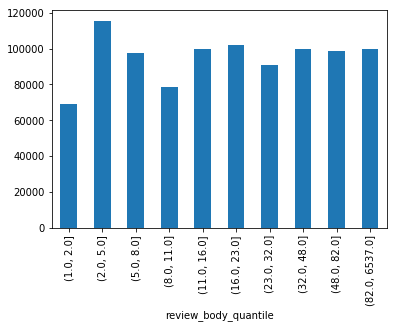

In [16]:
df.groupby("review_body_quantile").size().plot(kind='bar')

In [17]:
# let's try fixed binning - 10 fixed bins

fixed_bin = df.assign(review_body_fixed_bin=lambda x: pd.cut(x["review_body_wc"], 
                                                                   np.arange(0, 7000, 700)))
fixed_bin.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile,review_body_fixed_bin
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74,"(48.0, 82.0]","(0, 700]"
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318,"(82.0, 6537.0]","(0, 700]"
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4,"(2.0, 5.0]","(0, 700]"
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23,"(16.0, 23.0]","(0, 700]"
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5,"(2.0, 5.0]","(0, 700]"


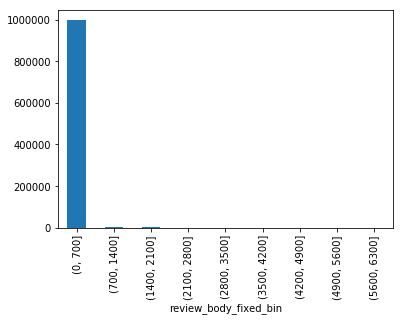

In [18]:
fixed_bin.groupby("review_body_fixed_bin").size().plot(kind='bar')

# looks like Yelp reviews tends to be more verbose than Amazon

90% of Amazon reviews have ~80 words or less compared to yelp reviews which is around ~55%